# 6614400266 นายภควัต ตันยาภิรมย์

In [1]:
import pandas as pd
import seaborn as sns

### 1. เปิดไฟล์ players.csv ขึ้นมาเพื่อใช้ในแบบฝึกหัดนี้ (อย่าลืมตัดคอลัมน์ว่างออกด้วย) 

- จากนั้นให้หารค่าในคอลัมน์ shots, passes, tackles, และ saves ด้วยจำนวนนาทีของผู้เล่นคนนั้น
- เปรียบเทียบที่เท่าเทียมกันและทำให้ตำแหน่ง (position) เป็น Category 
- เรียงลำดับจาก goalkeeper, defender, midfielder, forward

In [2]:
df = pd.read_csv('./Datasets/players.csv')
df = df.iloc[:,:8]
df.sample(5)

,surname,team,position,minutes,shots,passes,tackles,saves
31,Palermo,Argentina,forward,10,3,8,0,0
309,Guardado,Mexico,midfielder,142,5,92,2,0
252,Chiellini,Italy,defender,270,2,155,7,0
272,Doumbia,Ivory Coast,forward,11,0,2,0,0
61,Gilberto,Brazil,defender,33,0,6,4,0


In [3]:
df['shots'] = df['shots']/df['minutes']
df['passes'] = df['passes']/df['minutes']
df['tackles'] = df['tackles']/df['minutes']
df['saves'] = df['saves']/df['minutes']
df

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0.000000,0.375000,0.000000,0.000000
1,Belhadj,Algeria,defender,270,0.003704,0.540741,0.029630,0.000000
2,Boudebouz,Algeria,midfielder,74,0.040541,0.378378,0.013514,0.000000
3,Bougherra,Algeria,defender,270,0.003704,0.329630,0.040741,0.000000
4,Chaouchi,Algeria,goalkeeper,90,0.000000,0.188889,0.000000,0.022222
...,...,...,...,...,...,...,...,...
590,Holden,USA,midfielder,4,0.000000,0.500000,0.000000,0.000000
591,Howard,USA,goalkeeper,390,0.000000,0.207692,0.000000,0.035897
592,Jozy Altidore,USA,forward,356,0.022472,0.235955,0.005618,0.000000
593,Onyewu,USA,defender,170,0.005882,0.405882,0.011765,0.000000


In [4]:
df['position'] = pd.Categorical(df['position'], categories=['goalkeeper', 'defender', 'midfielder', 'forward'], ordered=True)
df.sort_values(by='position')

,surname,team,position,minutes,shots,passes,tackles,saves
330,Stekelenburg,Netherlands,goalkeeper,540,0.000000,0.275926,0.000000,0.027778
204,Kingson,Ghana,goalkeeper,510,0.000000,0.205882,0.001961,0.039216
260,Marchetti,Italy,goalkeeper,225,0.000000,0.093333,0.000000,0.004444
54,Schwarzer,Australia,goalkeeper,270,0.000000,0.188889,0.000000,0.048148
385,Ri Myong-Guk,North Korea,goalkeeper,270,0.000000,0.170370,0.000000,0.070370
...,...,...,...,...,...,...,...,...
444,Zigic,Serbia,forward,227,0.022026,0.286344,0.008811,0.000000
181,Klose,Germany,forward,356,0.030899,0.233146,0.011236,0.000000
180,Kiessling,Germany,forward,7,0.000000,0.714286,0.000000,0.000000
200,Gyan,Ghana,forward,501,0.053892,0.301397,0.001996,0.000000


### 2. แสดงแผนภาพการกระจายตัวแบบ probability density function ของการส่งลูก (passes) ของผู้เล่นทุกคน

/Users/bank/micromamba/envs/dl_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


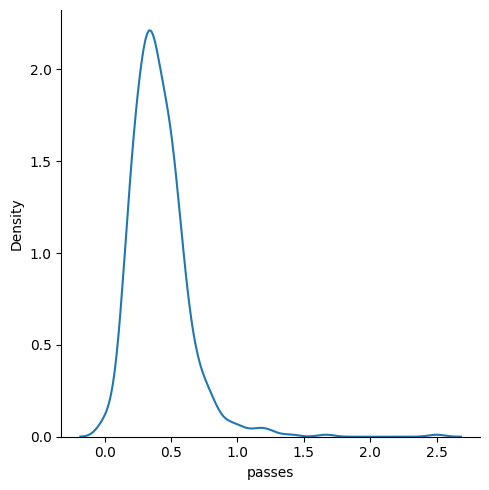

In [5]:
sns.displot(df.passes,kind='kde')

### 3. แสดง histogram ของการยิงประตู (shots) ของผู้เล่นทีม USA

/Users/bank/micromamba/envs/dl_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


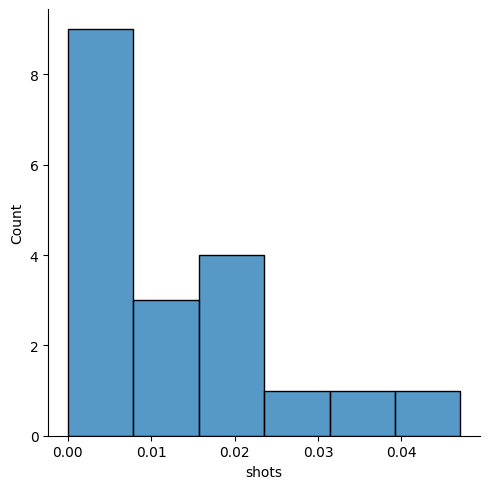

In [6]:
shots_USA = df[df['team'] == 'USA']
sns.displot(shots_USA.shots,bins=6)

### 4. แสดง relation plot แบบ scatter plot ระหว่าง passes (แกน x) กับ shots (แกน y) ของผู้เล่นทุกคน

/Users/bank/micromamba/envs/dl_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


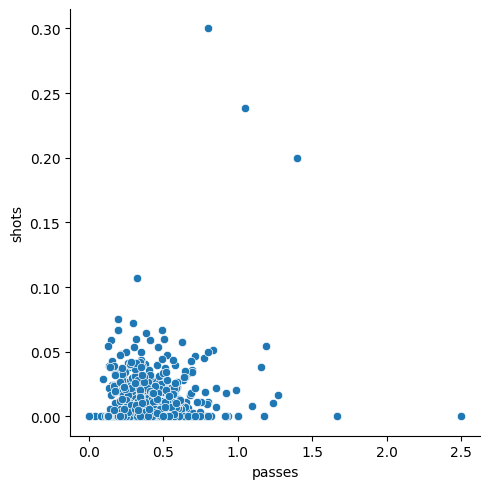

In [7]:
sns.relplot(df,x='passes',y='shots')

### 5. แสดง relation plot แบบ scatter plot ระหว่าง passes (แกน x) กับ shots (แกน y) ของผู้เล่นที่ม Brazil, Spain, USA โดยให้แยกสีระหว่างผู้เล่นแต่ละทีมและแยกสัญลักษณ์ระหว่างตำแหน่งการเล่นด้วย

/Users/bank/micromamba/envs/dl_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


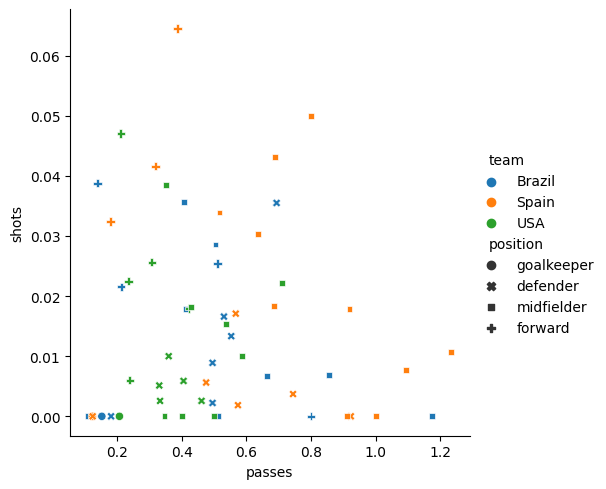

In [8]:
selected_teams = df.loc[df['team'].isin(['Brazil', 'Spain', 'USA'])]
sns.relplot(selected_teams,x='passes',y='shots',hue='team',style='position')

### 6. แสดง relation plot แบบ scatter plot ระหว่าง tackles (แกน x) กับ shots (แกน y) ของผู้เล่นทีม Brazil, Spain, USA แต่แสดงเป็นแบบ Grid โดยให้แถวแยกตามตำแหน่งผู้เล่นคอลัมน์แยกตามทีม

/Users/bank/micromamba/envs/dl_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


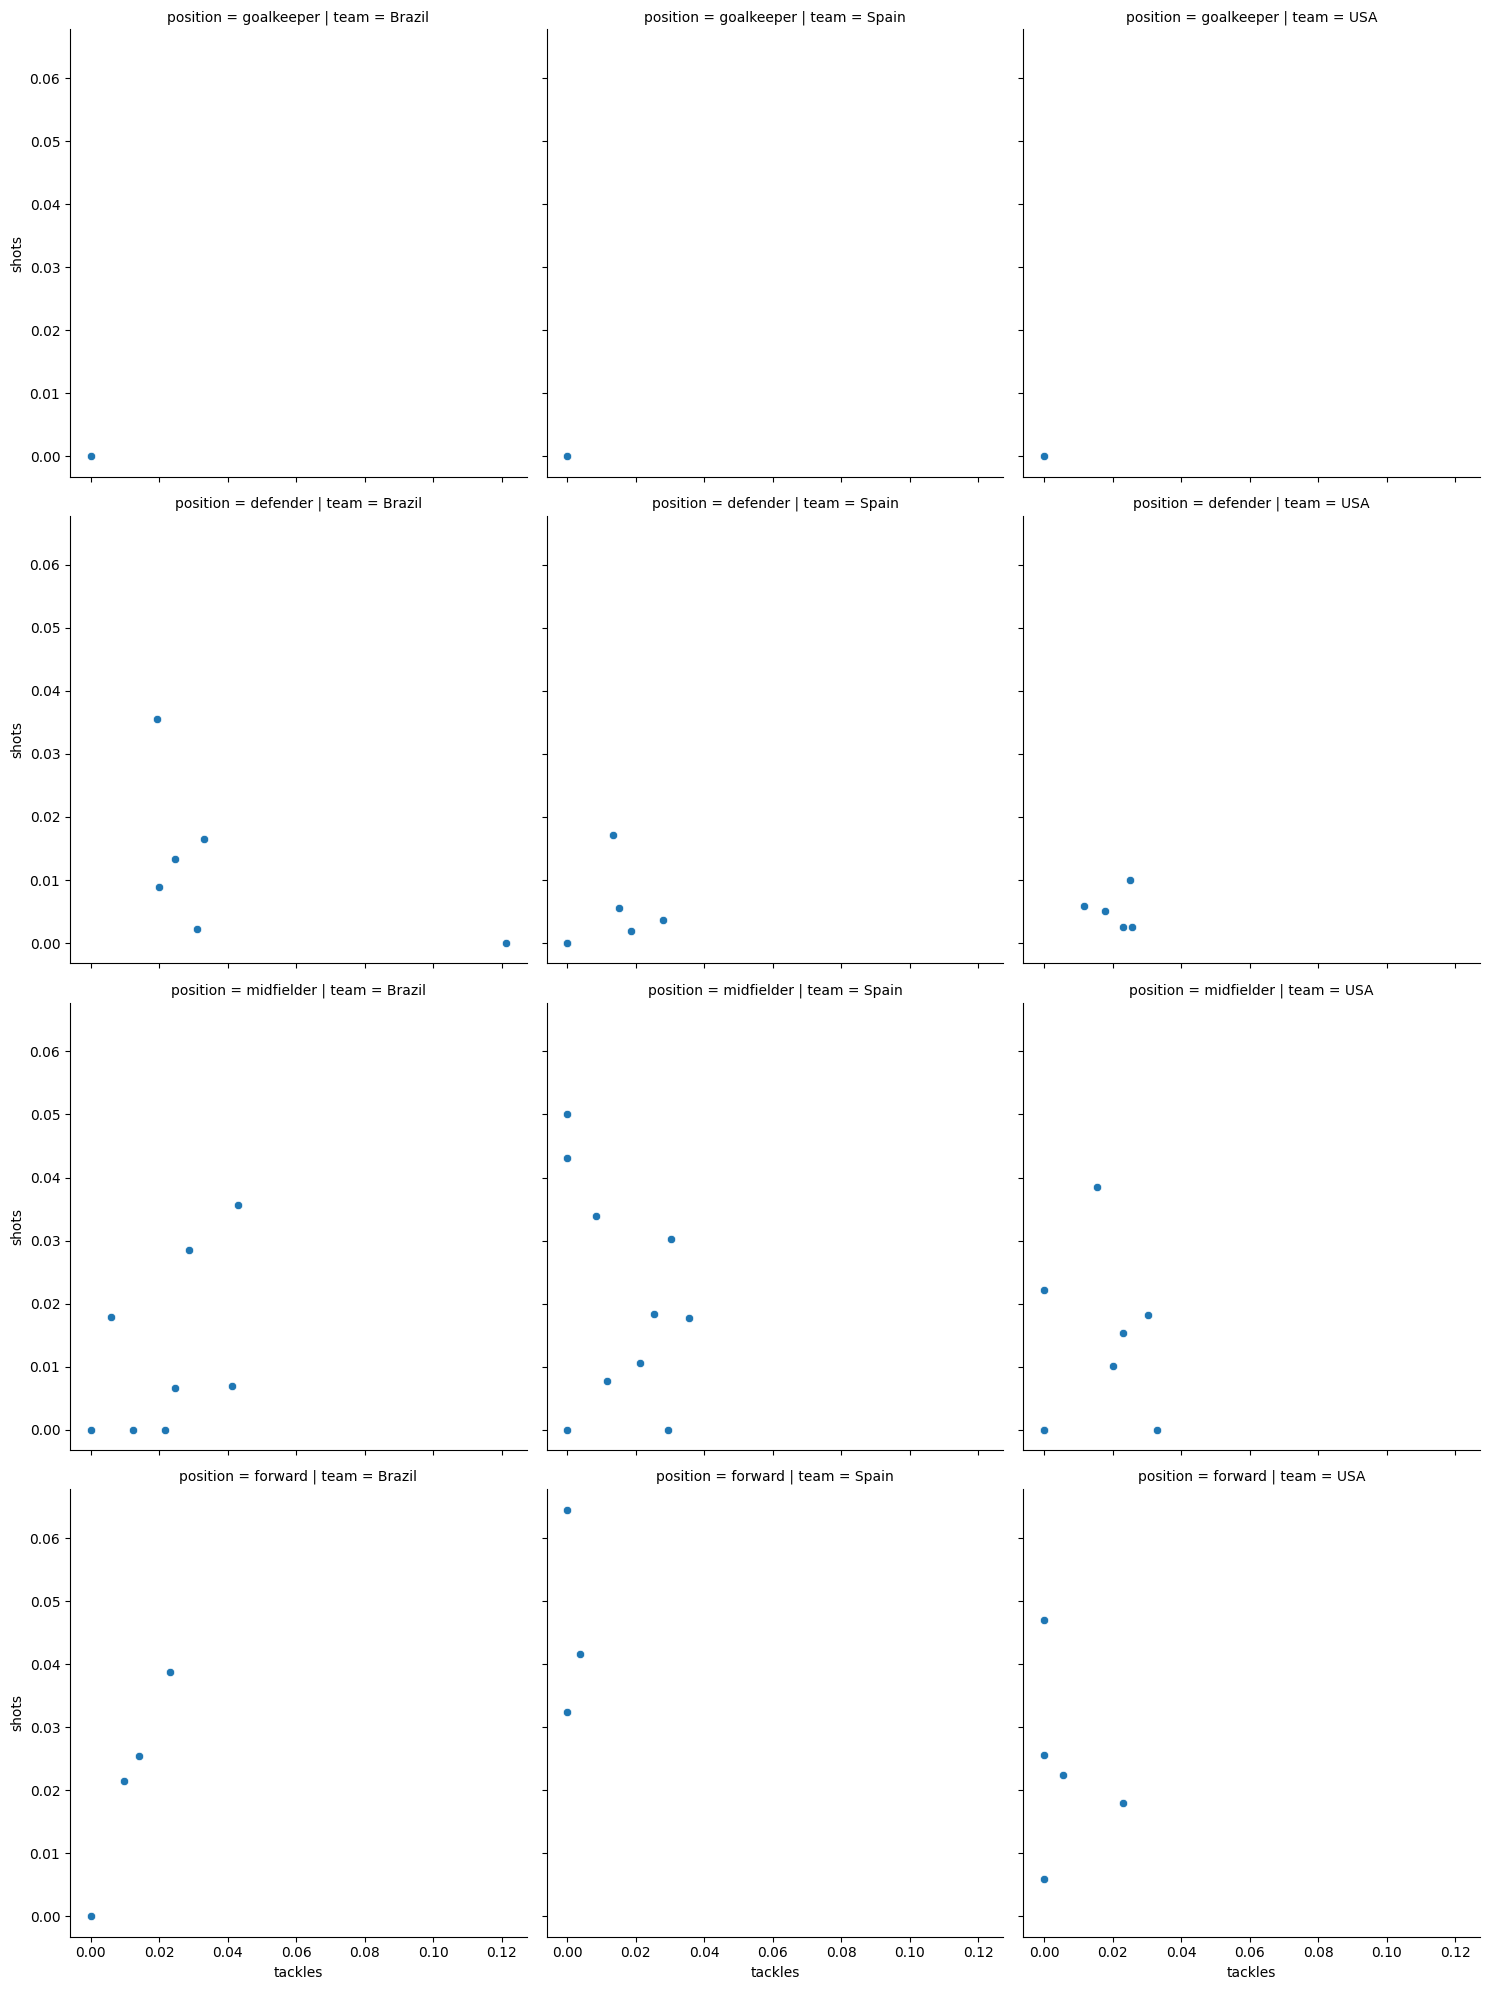

In [9]:
sns.relplot(selected_teams,x='tackles',y='shots',col='team',row='position')

### 7. แสดง Boxplot ของการส่งลูกของผู้เล่นทีม Brazil, Spain, USA

/Users/bank/micromamba/envs/dl_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


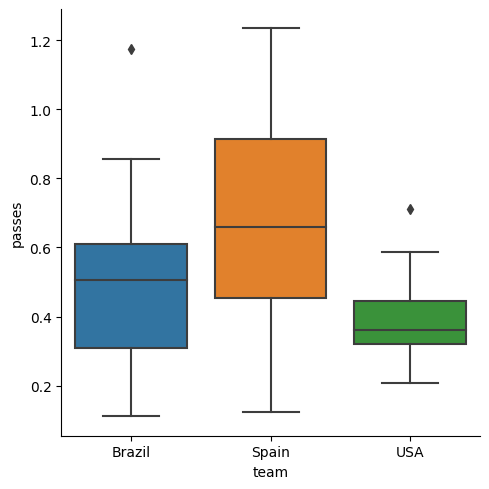

In [10]:
sns.catplot(selected_teams,x='team',y='passes',kind='box')

### 8. แสดง swarm ของการส่งลูกของผู้เล่นทีม Brazil, Spain, USA แยกสีตามตำแหน่ง

/Users/bank/micromamba/envs/dl_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


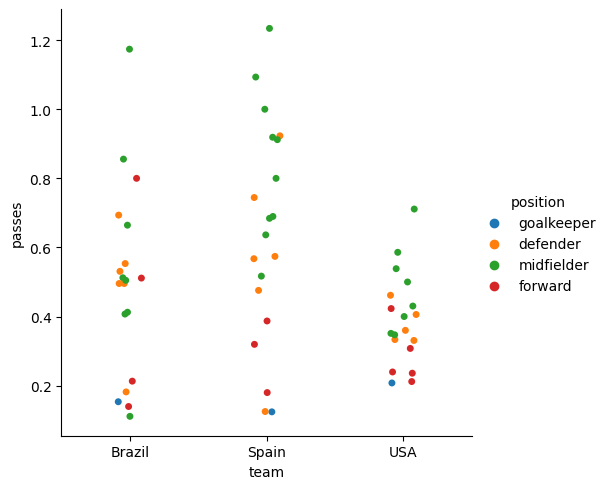

In [11]:
sns.catplot(selected_teams,x='team',y='passes',hue='position') 

### 9. แสดงกราฟแท่ง (bar) ของการสกัดลูก (tackles) ของผู้เล่นทีม Brazil, Spain, USA แต่ละตำแหน่งแยกสีตามทีม

/Users/bank/micromamba/envs/dl_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


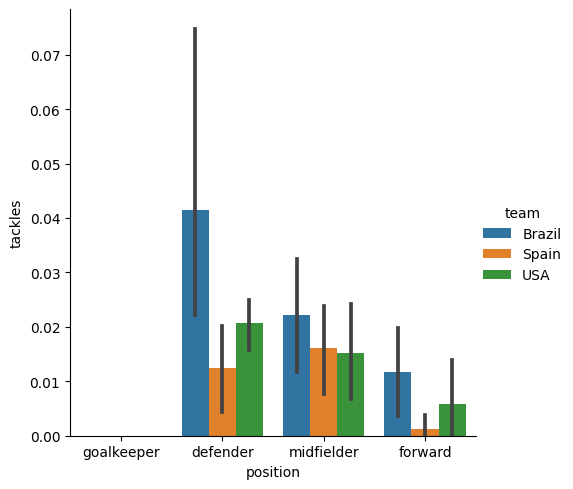

In [12]:
sns.catplot(selected_teams,x='position',y='tackles',hue='team',kind='bar')

### 10. แสดง scatter plot ของผลรวมค่า passes (เป็นแกน x) กับผลรวมค่า shots (แกน y) ของผู้เล่นทุกคนในทีม 'Brazil','Japan','USA','Spain','Algeria','France','England','South Korea' แยกสีตามทีม

/Users/bank/micromamba/envs/dl_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


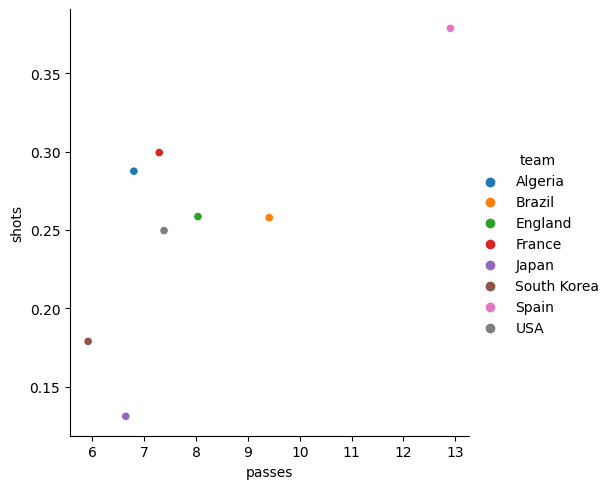

In [13]:
selected_teams_1 = df.loc[df['team'].isin(['Brazil','Japan', 'Spain', 'USA','Algeria','France','England','South Korea'])].groupby('team').sum(int)
sns.relplot(selected_teams_1,x='passes',y='shots',hue='team')